<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/DSC450_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATA FROM KAGGLE.COM**

In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download shivamb/vehicle-claim-fraud-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [86]:
from google.colab import files
uploaded = files.upload()

Saving insurance fraud claims.csv to insurance fraud claims (2).csv


In [87]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['insurance fraud claims.csv']))
# Dataset is now stored in a Pandas Dataframe

In [88]:
df.head

<bound method NDFrame.head of      months_as_customer  age  policy_number policy_bind_date current_date  \
0                   328   48         521585         10/17/14       3/3/23   
1                   228   42         342868          6/27/06       3/3/23   
2                   134   29         687698           9/6/00       3/3/23   
3                   256   41         227811          5/25/90       3/3/23   
4                   228   44         367455           6/6/14       3/3/23   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851          7/16/91       3/3/23   
996                 285   41         186934           1/5/14       3/3/23   
997                 130   34         918516          2/17/03       3/3/23   
998                 458   62         533940         11/18/11       3/3/23   
999                 456   60         556080         11/11/96       3/3/23   

     policy_age policy_state policy_csl  poli

# **EDA**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   current_date                 1000 non-null   object 
 5   policy_age                   999 non-null    float64
 6   policy_state                 1000 non-null   object 
 7   policy_csl                   1000 non-null   object 
 8   policy_deductable            1000 non-null   int64  
 9   policy_annual_premium        1000 non-null   float64
 10  umbrella_limit               1000 non-null   int64  
 11  insured_zip                  1000 non-null   int64  
 12  insured_sex                  1000 non-null   object 
 13  insured_education_l

In [90]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
current_date                      0
policy_age                        1
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day    

In [91]:
#Finding the mean of the column having NaN
mean_value=df['policy_age'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['policy_age'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
     months_as_customer  age  policy_number policy_bind_date current_date  \
0                   328   48         521585         10/17/14       3/3/23   
1                   228   42         342868          6/27/06       3/3/23   
2                   134   29         687698           9/6/00       3/3/23   
3                   256   41         227811          5/25/90       3/3/23   
4                   228   44         367455           6/6/14       3/3/23   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851          7/16/91       3/3/23   
996                 285   41         186934           1/5/14       3/3/23   
997                 130   34         918516          2/17/03       3/3/23   
998                 458   62         533940         11/18/11       3/3/23   
999                 456   60         556080         11/11/96       3/3/23   

     policy_age policy_state policy_csl  policy_deductab

In [92]:
#Identify all object variables 
df.dtypes=='object'

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date                True
current_date                    True
policy_age                     False
policy_state                    True
policy_csl                      True
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                     True
insured_education_level         True
insured_occupation              True
insured_hobbies                 True
insured_relationship            True
capital-gains                  False
capital-loss                   False
incident_date                   True
incident_type                   True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_state                  True
incident_city                   True
incident_location               True
i

In [93]:
#change fraud reported into binary 
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object kno`ws how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['fraud_reported']= label_encoder.fit_transform(df['fraud_reported'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,current_date,policy_age,policy_state,policy_csl,policy_deductable,policy_annual_premium,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,car_age,fraud_reported,_c39
0,328,48,521585,10/17/14,3/3/23,9.0,OH,250/500,1000,1406.91,...,71610,6510,13020,52080,Saab,92x,2004,19,1,NaN
1,228,42,342868,6/27/06,3/3/23,17.0,IN,250/500,2000,1197.22,...,5070,780,780,3510,Mercedes,E400,2007,16,1,NaN
2,134,29,687698,9/6/00,3/3/23,23.0,OH,100/300,2000,1413.14,...,34650,7700,3850,23100,Dodge,RAM,2007,16,0,NaN
3,256,41,227811,5/25/90,3/3/23,33.0,IL,250/500,2000,1415.74,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,9,1,NaN
4,228,44,367455,6/6/14,3/3/23,9.0,IL,500/1000,1000,1583.91,...,6500,1300,650,4550,Accura,RSX,2009,14,0,NaN


In [94]:
#Review all unique values for a column
print(df.insured_hobbies.unique())


['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']


In [95]:
print(df.incident_severity.unique())

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [96]:
print(df.fraud_reported.unique())



[1 0]


In [97]:
print(df.incident_date.unique())

['1/25/15' '1/21/15' '2/22/15' '1/10/15' '2/17/15' '1/2/15' '1/13/15'
 '2/27/15' '1/30/15' '1/5/15' '1/6/15' '2/15/15' '1/22/15' '1/8/15'
 '1/15/15' '1/29/15' '1/19/15' '1/1/15' '2/10/15' '1/11/15' '2/24/15'
 '1/9/15' '1/28/15' '1/7/15' '1/18/15' '2/28/15' '2/12/15' '1/24/15'
 '1/3/15' '1/16/15' '2/14/15' '2/21/15' '2/18/15' '2/26/15' '1/17/15'
 '1/27/15' '2/11/15' '1/12/15' '2/6/15' '1/20/15' '2/2/15' '2/20/15'
 '2/8/15' '2/23/15' '3/1/15' '1/14/15' '2/19/15' '2/9/15' '1/26/15'
 '1/23/15' '1/31/15' '2/3/15' '2/1/15' '2/5/15' '2/25/15' '2/16/15'
 '2/13/15' '2/4/15' '2/7/15' '1/4/15']


In [98]:
print(df.auto_model.unique())

['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']


In [99]:
print(df.policy_deductable.unique())


[1000 2000  500]


In [100]:
 
print(df.umbrella_limit.unique())

[       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]


In [101]:
print(df.age.unique())

[48 42 29 41 44 39 34 37 33 61 23 38 58 26 31 62 55 40 35 43 45 25 30 28
 49 54 47 59 27 56 32 36 64 60 51 46 50 57 53 24 52 19 21 63 20 22]


In [102]:
#Created age ranges 
ages = pd.DataFrame(df['age'])

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['age_range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)


print(ages)
#print(ages['age_range'])



     age age_range
0     48     40-49
1     42     40-49
2     29     18-29
3     41     40-49
4     44     40-49
..   ...       ...
995   38     30-39
996   41     40-49
997   34     30-39
998   62     60-69
999   60     50-59

[1000 rows x 2 columns]


In [103]:
df['age_range'] = ages['age_range']

print(df)

     months_as_customer  age  policy_number policy_bind_date current_date  \
0                   328   48         521585         10/17/14       3/3/23   
1                   228   42         342868          6/27/06       3/3/23   
2                   134   29         687698           9/6/00       3/3/23   
3                   256   41         227811          5/25/90       3/3/23   
4                   228   44         367455           6/6/14       3/3/23   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851          7/16/91       3/3/23   
996                 285   41         186934           1/5/14       3/3/23   
997                 130   34         918516          2/17/03       3/3/23   
998                 458   62         533940         11/18/11       3/3/23   
999                 456   60         556080         11/11/96       3/3/23   

     policy_age policy_state policy_csl  policy_deductable  \
0       9.000

In [104]:
print(df.policy_annual_premium.unique())

[1406.91 1197.22 1413.14 1415.74 1583.91 1351.1  1333.35 1137.03 1442.99
 1315.68 1253.12 1137.16 1215.36  936.61 1301.13 1131.4  1199.44  708.64
 1374.22 1475.73 1187.96  875.15  972.18 1268.79  883.31 1266.92 1322.1
  848.07 1291.7  1104.5   954.16 1337.28 1088.34 1558.29 1415.68 1334.15
  988.45 1222.48 1155.55 1262.08 1451.62 1737.66 1475.93  538.17 1081.08
 1454.43 1240.47 1273.7  1123.87 1245.89 1326.62 1073.83 1530.52 1201.41
 1393.57 1276.57 1082.49 1414.74 1470.06  870.63  795.23 1168.2   993.51
 1848.81 1641.73 1362.87 1239.22  835.02 1061.33 1279.08 1105.49 1055.53
  895.83 1632.93 1405.99 1425.54 1038.09 1307.11 1489.24  976.67 1340.43
 1267.81 1234.2  1318.06  769.95 1514.72  873.64 1612.43 1318.24 1226.83
 1326.44 1136.83 1322.78 1483.25 1515.3  1075.18 1690.27 1352.83 1148.73
  969.5  1463.82 1474.17 1497.35 1427.14 1495.1  1141.62 1125.37 1207.36
 1338.5  1074.07 1337.56 1298.91 1222.75 1059.52 1124.38 1110.37 1103.58
 1269.76  964.79 1167.3  1625.45 1394.43 1053.24 104

In [105]:
#Max and min for policy annual premium
df['policy_annual_premium'].agg(['min', 'max'])

min     433.33
max    2047.59
Name: policy_annual_premium, dtype: float64

In [106]:
#Created premium ranges 
policy_annual_premiums = pd.DataFrame(df['policy_annual_premium'])

bins = [200,500,700,900,1100,1300,1500,1700,1900,2200]
labels = ['200-499','500-699','700-899', '900-1099', '1100-1299', '1300-1499', '1500-1699', '1700-1899', '1900-2199']
policy_annual_premiums['policy_ann_cost_ranges'] = pd.cut(policy_annual_premiums.policy_annual_premium, bins, labels = labels,include_lowest = True)


print(policy_annual_premiums)

     policy_annual_premium policy_ann_cost_ranges
0                  1406.91              1300-1499
1                  1197.22              1100-1299
2                  1413.14              1300-1499
3                  1415.74              1300-1499
4                  1583.91              1500-1699
..                     ...                    ...
995                1310.80              1300-1499
996                1436.79              1300-1499
997                1383.49              1300-1499
998                1356.92              1300-1499
999                 766.19                700-899

[1000 rows x 2 columns]


In [107]:
df['policy_ann_cost_ranges'] = policy_annual_premiums['policy_ann_cost_ranges']
df

,months_as_customer,age,policy_number,policy_bind_date,current_date,policy_age,policy_state,policy_csl,policy_deductable,policy_annual_premium,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,car_age,fraud_reported,_c39,age_range,policy_ann_cost_ranges
0,328,48,521585,10/17/14,3/3/23,9.00000,OH,250/500,1000,1406.91,...,13020,52080,Saab,92x,2004,19,1,NaN,40-49,1300-1499
1,228,42,342868,6/27/06,3/3/23,17.00000,IN,250/500,2000,1197.22,...,780,3510,Mercedes,E400,2007,16,1,NaN,40-49,1100-1299
2,134,29,687698,9/6/00,3/3/23,23.00000,OH,100/300,2000,1413.14,...,3850,23100,Dodge,RAM,2007,16,0,NaN,18-29,1300-1499
3,256,41,227811,5/25/90,3/3/23,33.00000,IL,250/500,2000,1415.74,...,6340,50720,Chevrolet,Tahoe,2014,9,1,NaN,40-49,1300-1499
4,228,44,367455,6/6/14,3/3/23,9.00000,IL,500/1000,1000,1583.91,...,650,4550,Accura,RSX,2009,14,0,NaN,40-49,1500-1699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/91,3/3/23,32.00000,OH,500/1000,1000,1310.80,...,8720,61040,Honda,Accord,2006,17,0,NaN,30-39,1300-1499
996,285,41,186934,1/5/14,3/3/23,9.00000,IL,100/300,1000,1436.79,...,18080,72320,Volkswagen,Passat,2015,8,0,NaN,40-49,1300-1499
997,130,34,918516,2/17/03,3/3/23,20.00000,OH,250/500,500,1383.49,...,7500,52500,Suburu,Impreza,1996,27,0,NaN,30-39,1300-1499
998,458,62,533940,11/18/11,3/3/23,12.00000,IL,500/1000,2000,1356.92,...,5220,36540,Audi,A5,1998,25,0,NaN,60-69,1300-1499


In [108]:
#Confirm noduplicates

df.duplicated().sum()

0

In [109]:
#Confirm no null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
current_date                      0
policy_age                        0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day    

In [110]:
#drop columns
df=df.drop(['auto_year', 'policy_bind_date', 'current_date','_c39','policy_number','insured_zip', 'incident_location', 'incident_date', 'auto_model', 'insured_occupation'], axis = 1)
print(df)

     months_as_customer  age  policy_age policy_state policy_csl  \
0                   328   48     9.00000           OH    250/500   
1                   228   42    17.00000           IN    250/500   
2                   134   29    23.00000           OH    100/300   
3                   256   41    33.00000           IL    250/500   
4                   228   44     9.00000           IL   500/1000   
..                  ...  ...         ...          ...        ...   
995                   3   38    32.00000           OH   500/1000   
996                 285   41     9.00000           IL    100/300   
997                 130   34    20.00000           OH    250/500   
998                 458   62    12.00000           IL   500/1000   
999                 456   60    21.39039           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0                 1000                1406.91               0        MALE   
1                 2000       

In [111]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object kno`ws how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.

df['age_range']= label_encoder.fit_transform(df['age_range'])
df['policy_ann_cost_ranges']= label_encoder.fit_transform(df['policy_ann_cost_ranges'])
df['auto_make']= label_encoder.fit_transform(df['auto_make'])
df['umbrella_limit']= label_encoder.fit_transform(df['umbrella_limit'])
df['policy_deductable']= label_encoder.fit_transform(df['policy_deductable'])
df['policy_csl']= label_encoder.fit_transform(df['policy_csl'])
df['policy_state']= label_encoder.fit_transform(df['policy_state'])
df['insured_sex']= label_encoder.fit_transform(df['insured_sex'])
df['insured_education_level']= label_encoder.fit_transform(df['insured_education_level'])
df['insured_hobbies']= label_encoder.fit_transform(df['insured_hobbies'])
df['insured_relationship ']= label_encoder.fit_transform(df['insured_relationship'])
df['incident_type']= label_encoder.fit_transform(df['incident_type'])
df['collision_type']= label_encoder.fit_transform(df['collision_type'])
df['incident_severity']= label_encoder.fit_transform(df['incident_severity'])
df['authorities_contacted']= label_encoder.fit_transform(df['authorities_contacted'])
df['policy_state']= label_encoder.fit_transform(df['policy_state'])
df['incident_state']= label_encoder.fit_transform(df['incident_state'])


In [112]:
print(df)

     months_as_customer  age  policy_age  policy_state  policy_csl  \
0                   328   48     9.00000             2           1   
1                   228   42    17.00000             1           1   
2                   134   29    23.00000             2           0   
3                   256   41    33.00000             0           1   
4                   228   44     9.00000             0           2   
..                  ...  ...         ...           ...         ...   
995                   3   38    32.00000             2           2   
996                 285   41     9.00000             0           0   
997                 130   34    20.00000             2           1   
998                 458   62    12.00000             0           2   
999                 456   60    21.39039             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0                    1                1406.91               1            1   
1  

In [113]:
#Correlation 
df.corr()

,months_as_customer,age,policy_age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,car_age,fraud_reported,age_range,policy_ann_cost_ranges,insured_relationship
months_as_customer,1.000000,0.922098,0.046619,-0.000328,-0.026819,0.018481,0.005018,0.017800,0.060925,-0.000833,...,0.062108,0.065329,0.034940,0.061013,0.047655,0.000292,0.003099,0.878786,-0.045173,0.069727
age,0.922098,1.000000,0.035698,-0.014533,-0.015185,0.020561,0.014404,0.021924,0.073337,0.000969,...,0.069863,0.075522,0.060898,0.062588,0.030410,-0.001354,-0.008350,0.952810,-0.058609,0.074832
policy_age,0.046619,0.035698,1.000000,0.006372,0.016424,0.051808,0.000283,-0.044798,0.033609,-0.017796,...,0.001525,-0.001440,0.001995,0.001994,0.004505,0.015409,0.001286,0.042162,-0.003898,0.007592
policy_state,-0.000328,-0.014533,0.006372,1.000000,0.001027,0.008213,0.012455,-0.031793,-0.020481,-0.034327,...,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.002114,0.022229,-0.018573,-0.008558,-0.018506
policy_csl,-0.026819,-0.015185,0.016424,0.001027,1.000000,0.001986,0.023978,0.022779,-0.010757,0.009153,...,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.033082,-0.021603,-0.014583,-0.045064,-0.030063
policy_deductable,0.018481,0.020561,0.051808,0.008213,0.001986,1.000000,0.001624,0.009402,-0.011948,0.012000,...,0.016792,0.034352,0.055172,0.000502,-0.030775,-0.024921,0.009742,0.019402,-0.074582,-0.025468
policy_annual_premium,0.005018,0.014404,0.000283,0.012455,0.023978,0.001624,1.000000,-0.007334,0.038853,-0.019715,...,0.009094,-0.017633,-0.011654,0.020246,0.000045,0.049226,-0.028017,-0.000656,-0.551214,0.001925
umbrella_limit,0.017800,0.021924,-0.044798,-0.031793,0.022779,0.009402,-0.007334,1.000000,0.009733,-0.019668,...,-0.040896,-0.045625,-0.024954,-0.039004,-0.007169,-0.010528,0.056474,0.024061,-0.044298,0.073487
insured_sex,0.060925,0.073337,0.033609,-0.020481,-0.010757,-0.011948,0.038853,0.009733,1.000000,0.009002,...,-0.023727,0.000924,-0.014868,-0.029609,0.026457,0.028247,0.029450,0.064127,-0.021104,0.002855
insured_education_level,-0.000833,0.000969,-0.017796,-0.034327,0.009153,0.012000,-0.019715,-0.019668,0.009002,1.000000,...,0.074226,0.081880,0.055794,0.068348,0.055202,-0.043509,-0.012460,-0.018946,-0.015940,-0.023488


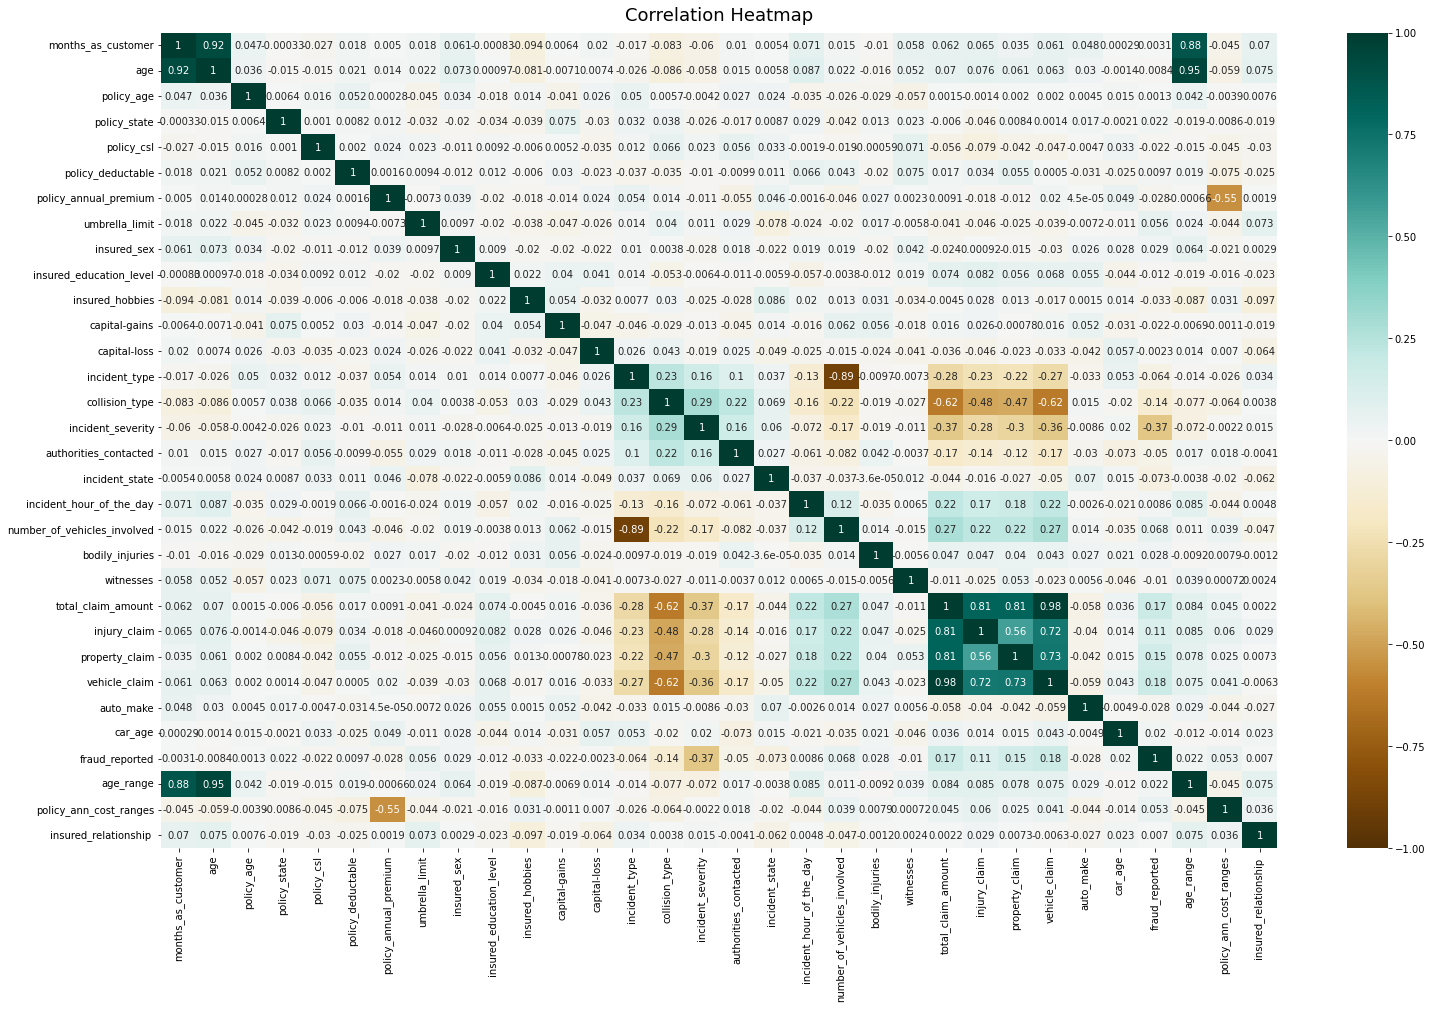

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
#split dataset in features and target variable
feature_cols = ['umbrella_limit','number_of_vehicles_involved','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim', 'policy_ann_cost_ranges','age_range','insured_sex']
X = df[feature_cols] # Features
y = df.fraud_reported # Target variable

#print(df1[feature_cols])
print(df.fraud_reported)

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64


##**K-NN MODELING**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8)


In [ ]:
# Feature Scaling
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Obtain the pairs candiate value and metric value 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=13)

candidates = np.arange(4,16)
mae_metrics = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    metric = mean_absolute_error(y_true=y_val, y_pred=y_pred)
    mae_metrics.append(metric)

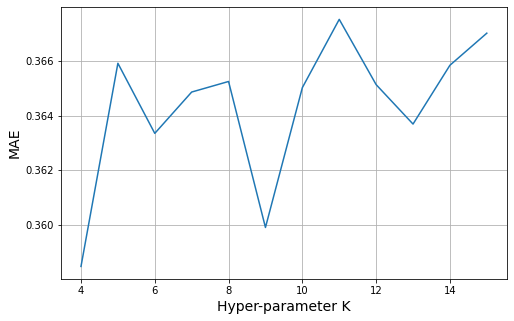

In [ ]:
#Visualize MAE associated with each K value
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mae_metrics)
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.grid();

In [ ]:
# Feature Scaling
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Use 10-fold cross-validation to get the metrics
from sklearn.model_selection import cross_val_score
candidates = np.arange(4,16)
mean_mae = []
std_mae = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    cv_results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    mean_score, std_score = -1*cv_results.mean(), cv_results.std()
    mean_mae.append(mean_score)
    std_mae.append(std_score)

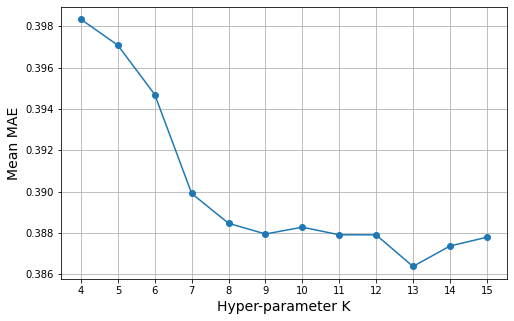

In [ ]:
#Visualize cross-validated MAE
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mean_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

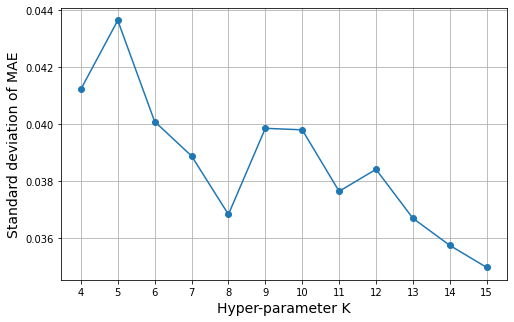

In [ ]:
#the standard deviation of each of the 10 MAE estimations
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, std_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Standard deviation of MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.67, 0.73, 0.73, 0.73, 0.73, 0.72, 0.73, 0.72, 0.73, 0.72, 0.73,
       0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.72, 0.72])

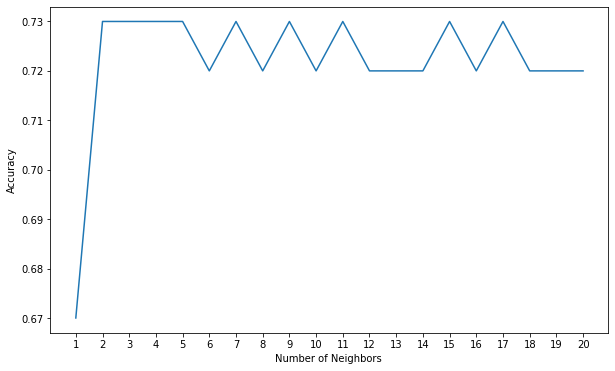

In [ ]:
#Visualize ACCURACY AGAINST NUMBER OF NEIGHBORS 
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [4],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
# find the best score
g_res.best_score_

0.7044444444444444

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=7)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
print('Training set accuracy:', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_knn))

Training set accuracy: 0.7366666666666667
Test set accuracy:  0.73


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        72
           1       1.00      0.04      0.07        28

    accuracy                           0.73       100
   macro avg       0.86      0.52      0.46       100
weighted avg       0.80      0.73      0.63       100



# **Logistic Regression Model **

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [ ]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(y_pred,y_test)

array([[144,  55],
       [  1,   0]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       199
           1       0.00      0.00      0.00         1

    accuracy                           0.72       200
   macro avg       0.50      0.36      0.42       200
weighted avg       0.99      0.72      0.83       200



In [ ]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
print('The accuracy of the Logistic Regression is', accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression is 0.72


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.595
[[101  44]
 [ 37  18]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       145
           1       0.29      0.33      0.31        55

    accuracy                           0.59       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.61      0.59      0.60       200

